In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [42]:
file_path =  r"C:\Weather Analysis\weather.csv"
weather = pd.read_csv(file_path)


In [43]:
print(weather.head())


   Data.Precipitation   Date.Full  Date.Month  Date.Week of  Date.Year  \
0                0.00  2016-01-03           1             3       2016   
1                0.00  2016-01-03           1             3       2016   
2                0.16  2016-01-03           1             3       2016   
3                0.00  2016-01-03           1             3       2016   
4                0.01  2016-01-03           1             3       2016   

  Station.City Station.Code Station.Location Station.State  \
0   Birmingham          BHM   Birmingham, AL       Alabama   
1   Huntsville          HSV   Huntsville, AL       Alabama   
2       Mobile          MOB       Mobile, AL       Alabama   
3   Montgomery          MGM   Montgomery, AL       Alabama   
4    Anchorage          ANC    Anchorage, AK        Alaska   

   Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
0                         39                         46   
1                         39                         47   
2    

In [44]:
weather = weather.fillna(method='ffill').fillna(method='bfill')


C:\Users\R.P.RAJESHKANNAN\AppData\Local\Temp\ipykernel_14308\1035855087.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather = weather.fillna(method='ffill').fillna(method='bfill')


In [45]:
weather = weather[(np.abs(stats.zscore(weather.select_dtypes(include=[np.number]))) < 3).all(axis=1)]


In [46]:
print(weather.describe())

       Data.Precipitation    Date.Month  Date.Week of  Date.Year  \
count        15897.000000  15897.000000  15897.000000    15897.0   
mean             0.492244      6.439202     15.928666     2016.0   
std              0.691318      3.432426      8.777499        0.0   
min              0.000000      1.000000      1.000000     2016.0   
25%              0.000000      4.000000      8.000000     2016.0   
50%              0.180000      6.000000     16.000000     2016.0   
75%              0.700000      9.000000     24.000000     2016.0   
max              3.540000     12.000000     31.000000     2016.0   

       Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
count               15897.000000               15897.000000   
mean                   56.649934                  66.749764   
std                    18.177771                  19.165026   
min                     0.000000                   7.000000   
25%                    44.000000                  54.000000   
50%      

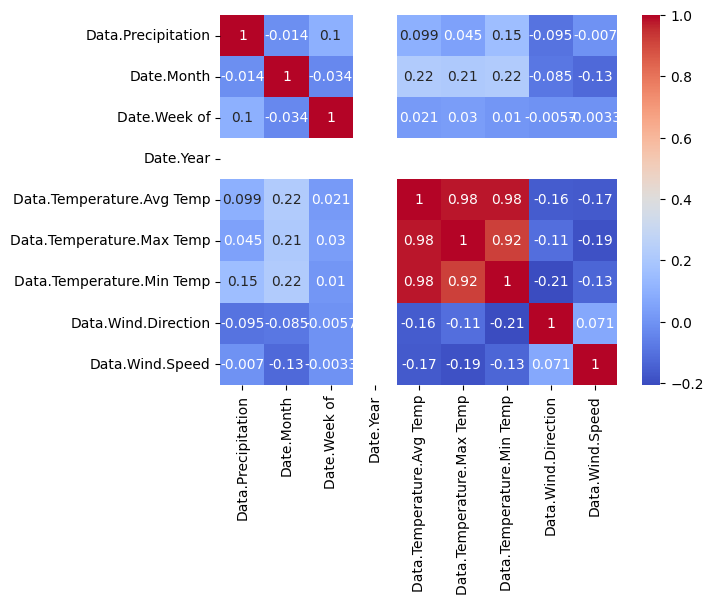

In [47]:
numeric_cols = weather.select_dtypes(include=[np.number]).columns
corr = weather[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [48]:
X = weather[['Data.Wind.Speed']]  # Independent variable
y = weather['Data.Temperature.Avg Temp']  # Dependent variab

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 329.9063699261588


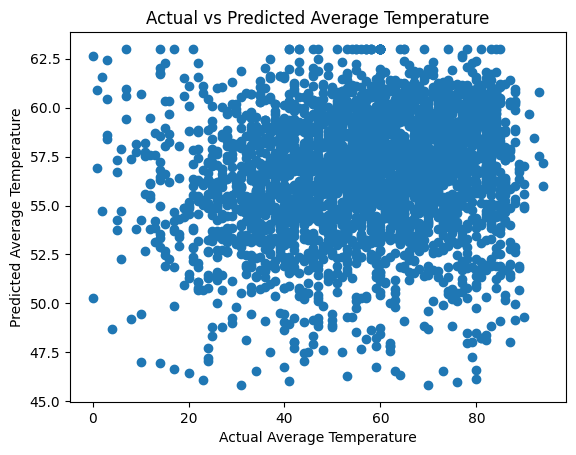

In [53]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Average Temperature")
plt.ylabel("Predicted Average Temperature")
plt.title("Actual vs Predicted Average Temperature")
plt.show()